**CNN**


---


designed to extract features from grid-like matrix datasets.

( neural networks that share their parameters.) = (shares filters ( weights on data))


*   input layer
*   Convolutional layer
*   pooling layer
*   fully connected layers



لایه‌های کانولوشن از مجموعه‌ای از فیلترهای قابل یادگیری (یا کرنل‌ها) تشکیل شده‌اند که معمولاً عرض و ارتفاع کوچکی دارند و عمقشان برابر با عمق ورودی است



در پاس رو به جلو (Forward Pass)، فیلتر را به صورت مرحله به مرحله روی کل حجم ورودی حرکت می‌دهیم. هر مرحله‌ای که فیلتر حرکت می‌کند را stride (گام حرکت) می‌نامیم (مثلاً مقدار stride می‌تواند ۲ یا ۳ یا حتی ۴ باشد وقتی تصویر بزرگ است).




در هر موقعیت، ما ضرب داخلی (dot product) بین وزن‌های کرنل و بخش مربوطه از ورودی را محاسبه می‌کنیم.

با حرکت دادن فیلتر روی تصویر، برای هر فیلتر یک خروجی دوبعدی به دست می‌آوریم.
اگر چندین فیلتر داشته باشیم، این خروجی‌ها روی هم انباشته می‌شوند و در نهایت یک خروجی سه‌بعدی خواهیم داشت که عمق آن برابر تعداد فیلترهاست.
شبکه تمام این فیلترها را در طول آموزش یاد می‌گیرد.

**Different architecture**

**1. LeNet-5**

to recognize handwritten and machine-printed characters

contains ***7***   layers excluding the input layer

1. Input layer :

                Input pixel values are normalized such that the background (white) corresponds to a value of 0, and the foreground (black) corresponds to a value of 1.

2. Layer C1 (Convolutional Layer) :

                n of filters 6
                filter size 5
                padding 0 stride 1

                156 filters and 28 * 28 * 156 connections

3. Layer S2 (Subsampling Layer) = pooling layer:

                Feature Maps: 6 feature maps.
                Size: 14x14 (each unit connected to a 2x2 neighborhood in C1).
                Operation: Each unit adds four inputs, multiplies by a trainable coefficient, adds a bias, and applies a sigmoid function.
                Parameters: 12 trainable parameters and 5,880 connections.

4. Layer C3 (Convolutional Layer)

5. Layer S4 (Subsampling Layer)

6. Layer C5 (Convolutional Layer) = fully connected

7.  Layer F6 (Fully Connected Layer)

8. Output Layer


Convolutional Layers (Cx) :  (Cx): These layers apply convolution operations to the input, using multiple filters to extract different features.

Subsampling Layers (Sx) : to reduce the spatial dimensions of the feature maps. This helps to control overfitting, reduce the computational load, and make the representation more compact.

Fully Connected Layers (Fx): These layers are densely connected, meaning each neuron in these layers is connected to every neuron in the previous layer. This allows the network to combine features learned in previous layers to make final predictions.



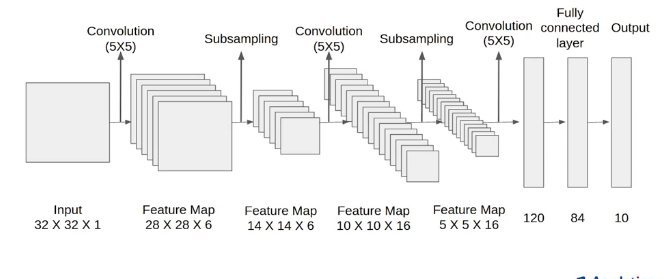

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [9]:
model = Sequential([
    Conv2D(filters=6, kernel_size=(5,5),strides=(1,1), activation= "tanh",input_shape=(28,28,1)),

    AveragePooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation="tanh"),

    AveragePooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters=120,kernel_size=(4,4),strides=(1,1),activation="tanh"),

    Flatten(),

    Dense(84, activation="tanh"),

    Dense(10, activation="softmax")
])

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
422/422 - 22s - 52ms/step - accuracy: 0.8930 - loss: 0.3762 - val_accuracy: 0.9557 - val_loss: 0.1522
Epoch 2/10
422/422 - 18s - 43ms/step - accuracy: 0.9566 - loss: 0.1428 - val_accuracy: 0.9722 - val_loss: 0.0963
Epoch 3/10
422/422 - 20s - 47ms/step - accuracy: 0.9724 - loss: 0.0907 - val_accuracy: 0.9785 - val_loss: 0.0771
Epoch 4/10
422/422 - 18s - 43ms/step - accuracy: 0.9791 - loss: 0.0680 - val_accuracy: 0.9843 - val_loss: 0.0559
Epoch 5/10
422/422 - 19s - 45ms/step - accuracy: 0.9835 - loss: 0.0529 - val_accuracy: 0.9832 - val_loss: 0.0544
Epoch 6/10
422/422 - 18s - 44ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.9863 - val_loss: 0.0474
Epoch 7/10
422/422 - 19s - 45ms/step - accuracy: 0.9882 - loss: 0.0371 - val_accuracy: 0.9868 - val_loss: 0.0494
Epoch 8/10
422/422 - 18s - 42ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9848 - val_loss: 0.0511
Epoch 9/10
422/422 - 18s - 43ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9855 - 

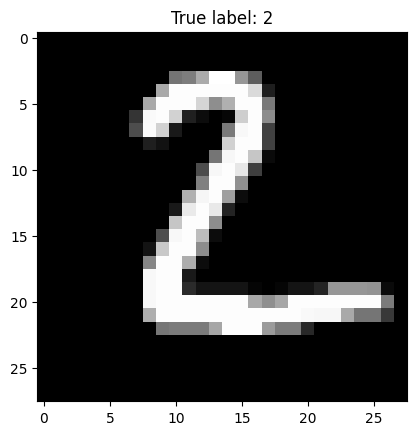

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted label: 2


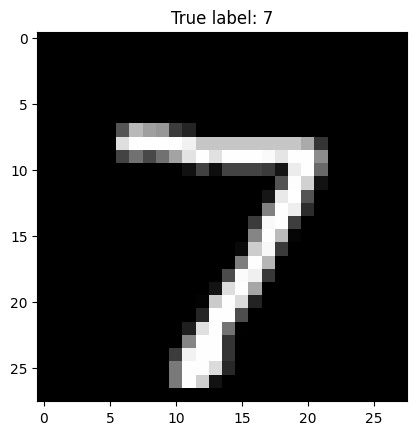

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted label: 7


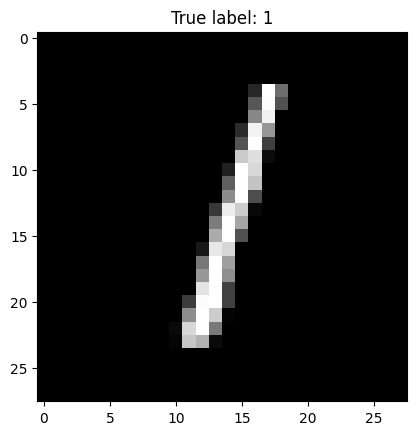

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted label: 1


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def show(index):

  img = x_test[index]

  plt.imshow(img.reshape(28,28), cmap="gray")
  plt.title(f"True label: {np.argmax(y_test[index])}")
  plt.show()


  img_input = img.reshape(1,28,28,1)

  prediction = model.predict(img_input)
  predicted_class = np.argmax(prediction)

  print(f"Predicted label: {predicted_class}")


show(1)
show(0)
show(2)